In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

In [3]:
features = pd.read_csv("data/alt_acsincome_ca_features_85.csv")
features.head()

,AGEP,COW,SCHL,MAR,OCCP,POBP,RELP,WKHP,SEX,RAC1P
0,41.0,4.0,24.0,1.0,2555.0,6.0,1.0,60.0,2.0,1.0
1,77.0,7.0,22.0,1.0,4920.0,39.0,0.0,35.0,1.0,1.0
2,38.0,1.0,18.0,1.0,440.0,6.0,1.0,50.0,1.0,1.0
3,30.0,1.0,22.0,5.0,1555.0,6.0,2.0,80.0,1.0,6.0
4,36.0,1.0,16.0,1.0,4030.0,314.0,1.0,70.0,2.0,1.0


In [4]:
labels = pd.read_csv("data/alt_acsincome_ca_labels_85.csv")
labels.head()

,PINCP
0,True
1,True
2,False
3,True
4,False


In [5]:
dataset = pd.concat([features, labels], axis=1)
dataset.head()

,AGEP,COW,SCHL,MAR,OCCP,POBP,RELP,WKHP,SEX,RAC1P,PINCP
0,41.0,4.0,24.0,1.0,2555.0,6.0,1.0,60.0,2.0,1.0,True
1,77.0,7.0,22.0,1.0,4920.0,39.0,0.0,35.0,1.0,1.0,True
2,38.0,1.0,18.0,1.0,440.0,6.0,1.0,50.0,1.0,1.0,False
3,30.0,1.0,22.0,5.0,1555.0,6.0,2.0,80.0,1.0,6.0,True
4,36.0,1.0,16.0,1.0,4030.0,314.0,1.0,70.0,2.0,1.0,False


In [6]:
shape = dataset.shape

* AGEP: Age
* COW: Class of worker
* SCHL: Educational attainment
* MAR: Marital status
* OCCP: Occupation
* POBP: Place of Birth
* RELP: Relationship
* WKHP: Hours worked per week past 12 months
* SEX: Sex
* RAC1P: Recoded detailed race code
* PINCP: Total person's income

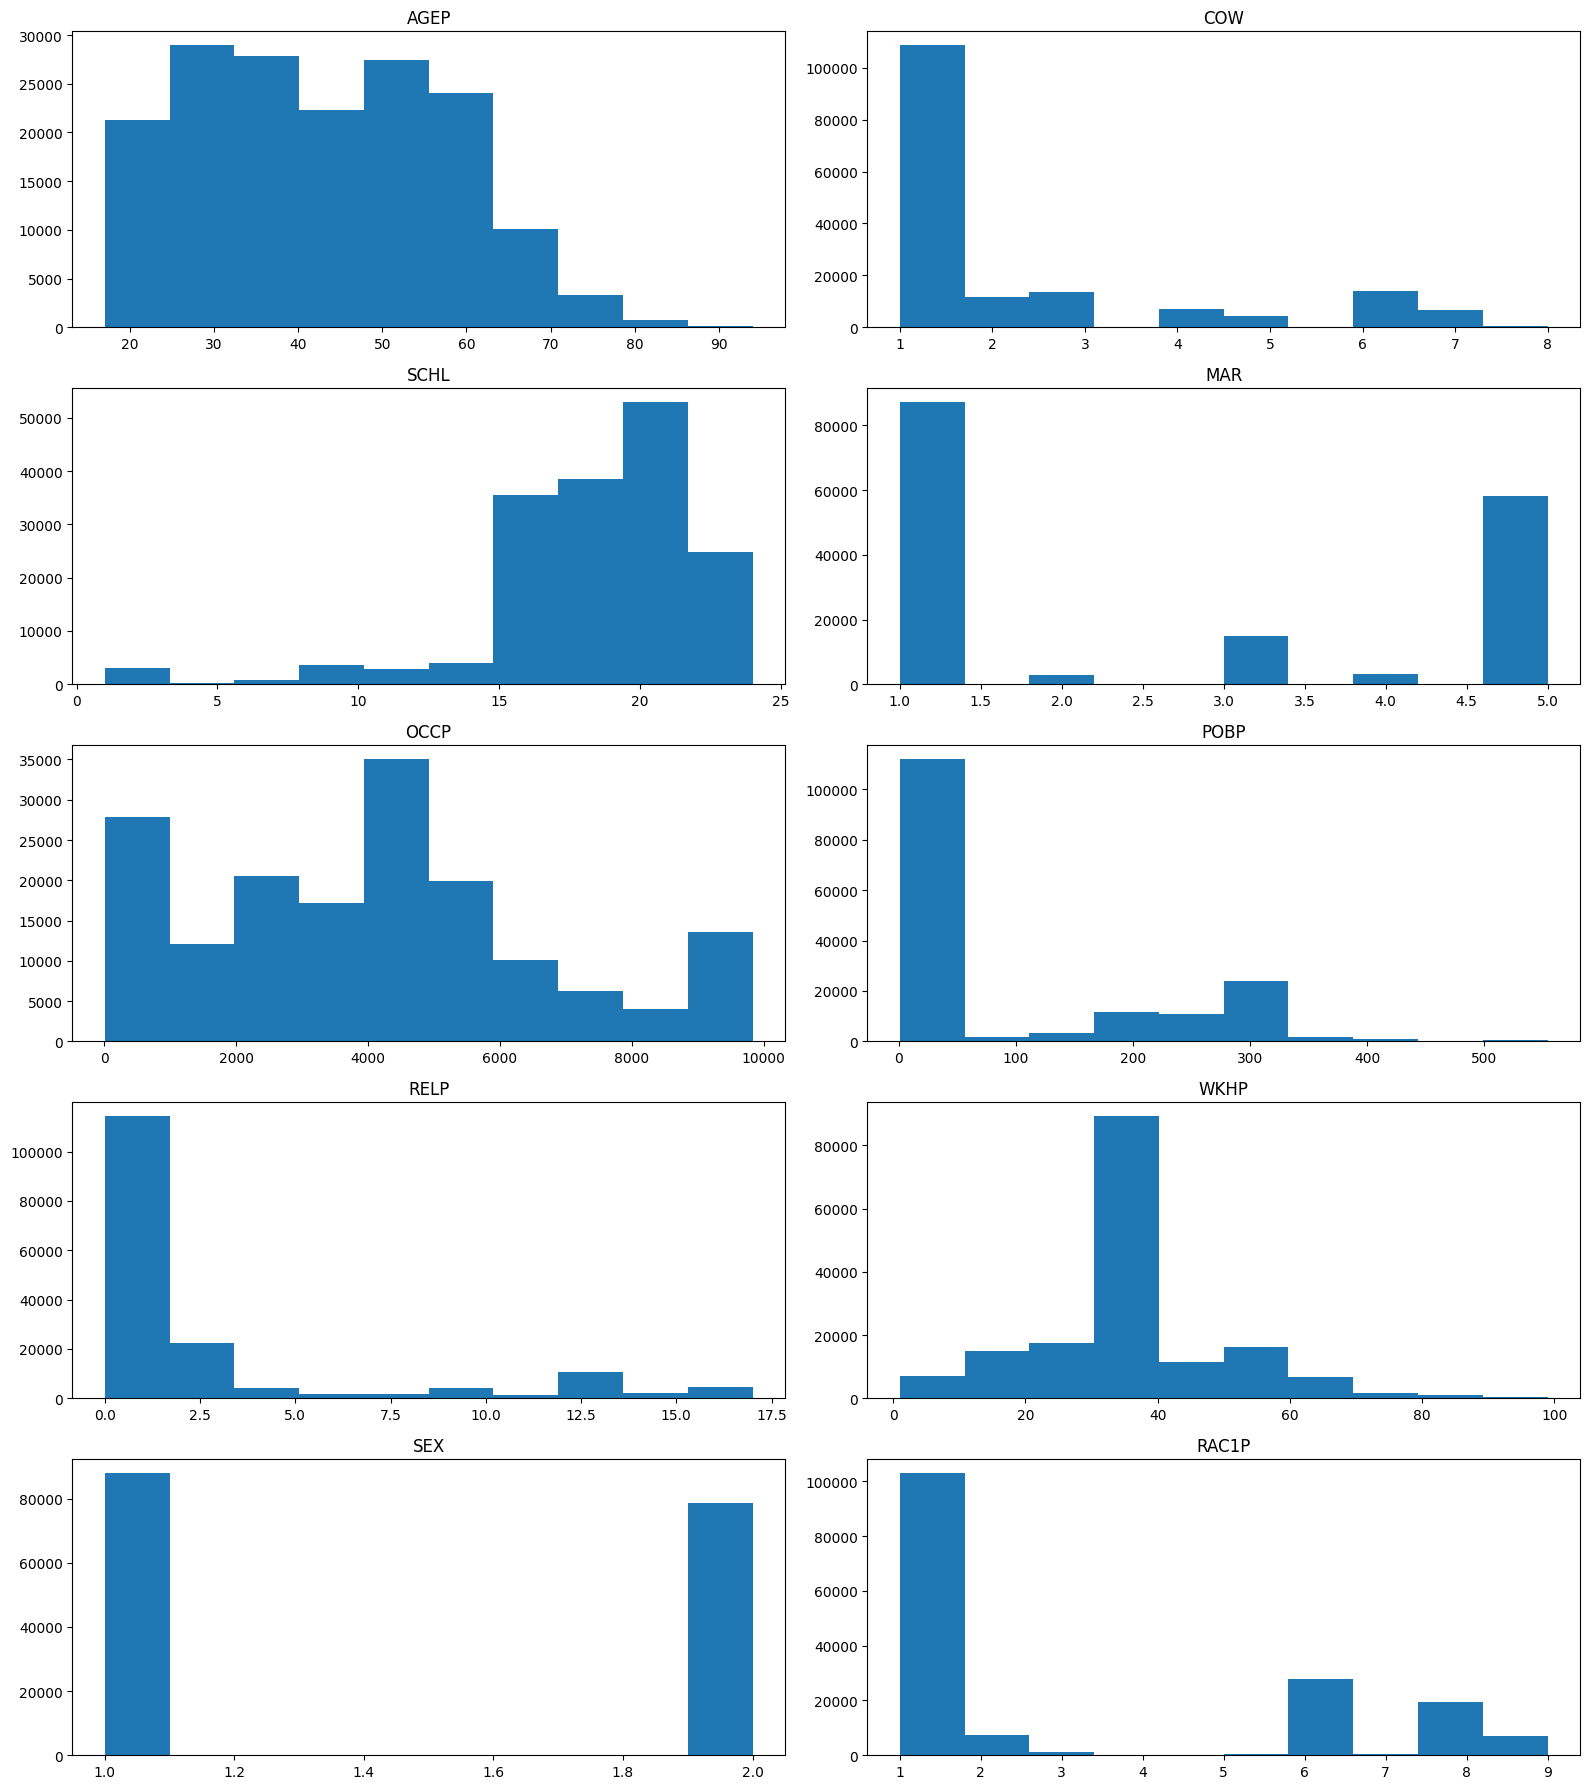

In [7]:
import matplotlib.pyplot as plt

num_cols = len(features.columns)
nrows = num_cols // 2 + num_cols % 2
ncols = 2

fig, axes = plt.subplots(nrows, ncols, figsize=(16, 18))
axes = axes.flatten()

for i in range(num_cols):
    axes[i].hist(features.iloc[:, i])
    axes[i].set_title(features.columns[i])

for j in range(num_cols, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

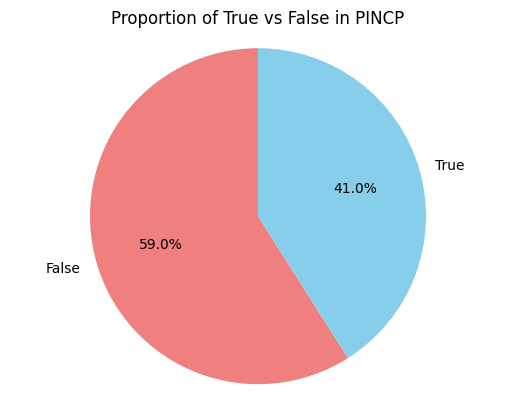

In [8]:
counts = labels['PINCP'].value_counts()

plt.pie(counts, labels=counts.index.astype(str), autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'skyblue'])
plt.title('Proportion of True vs False in PINCP')
plt.axis('equal')

plt.show()

In [9]:
subdataset_of_trues = dataset[dataset["PINCP"] == True]
subdataset_of_trues.head()
subdataset_of_trues.shape

(68203, 11)

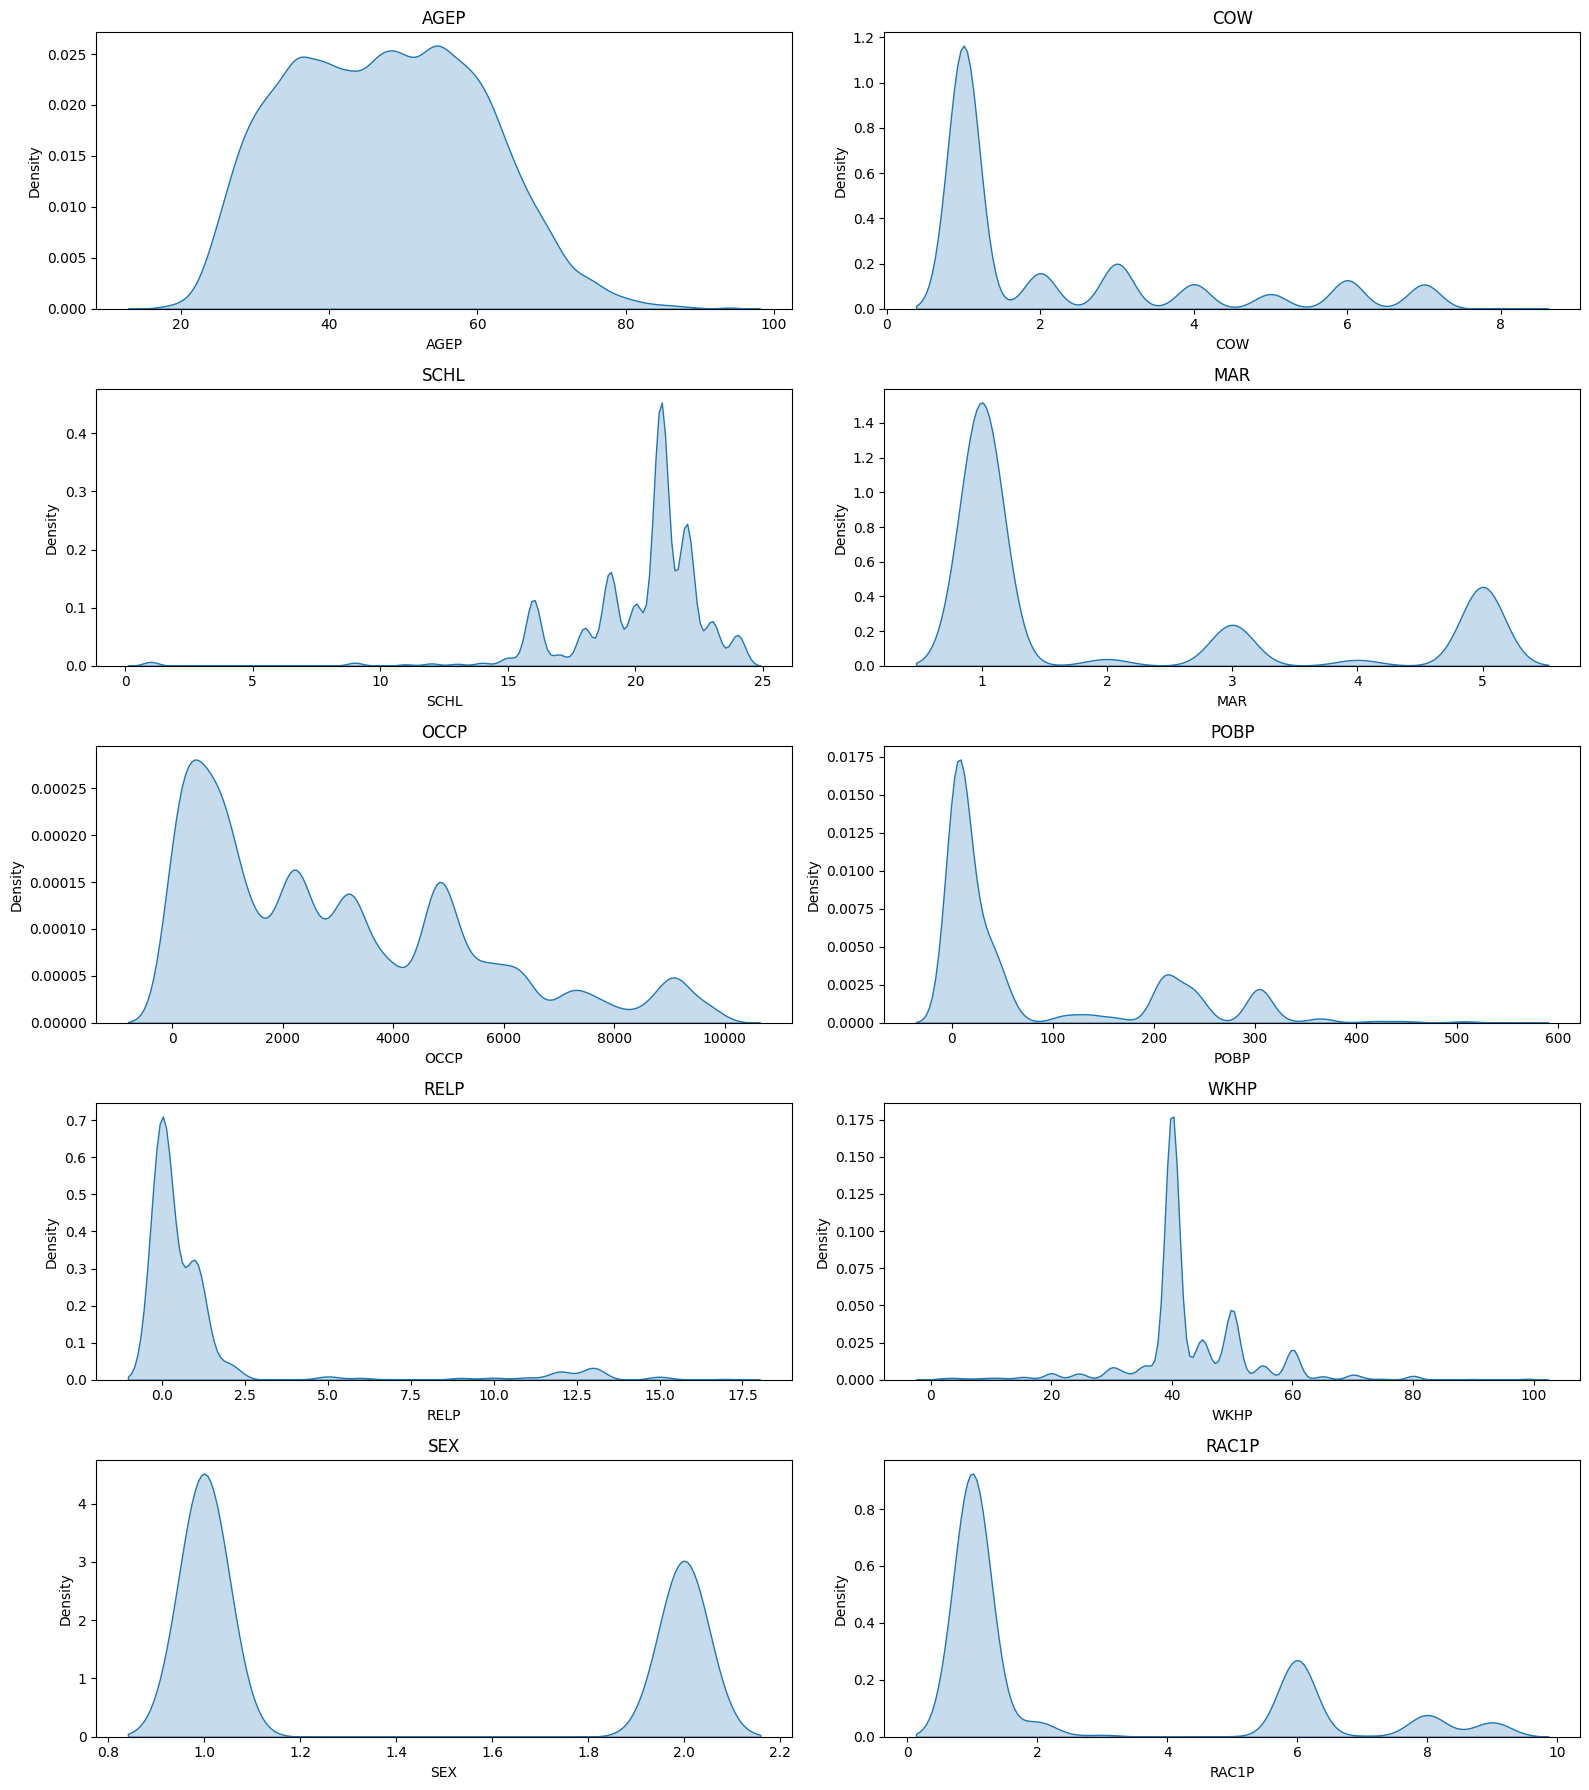

In [10]:
import seaborn as sns

subfeatures_of_trues = subdataset_of_trues.drop(columns=["PINCP"])
num_cols = len(subfeatures_of_trues.columns)
nrows = num_cols // 2 + num_cols % 2
ncols = 2

fig, axes = plt.subplots(nrows, ncols, figsize=(16, 18))
axes = axes.flatten()

for i in range(num_cols):
    sns.kdeplot(subfeatures_of_trues.iloc[:, i], ax=axes[i], shade=True)
    axes[i].set_title(subfeatures_of_trues.columns[i])

for j in range(num_cols, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

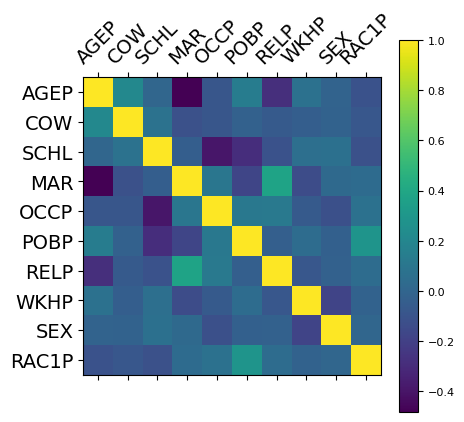

In [11]:
plt.matshow(features.corr())
plt.xticks(range(features.select_dtypes(['number']).shape[1]), features.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(features.select_dtypes(['number']).shape[1]), features.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=8)
plt.show()

In [12]:
from sklearn.preprocessing import OneHotEncoder

columns_to_encode = ["COW", "SCHL", "MAR", "OCCP", "POBP", "RELP", "SEX", "RAC1P"]

encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
features_to_encode = features[columns_to_encode]

encoded_features_array = encoder.fit_transform(features_to_encode)
encoded_features_columns = encoder.get_feature_names_out(columns_to_encode)
encoded_features = pd.DataFrame(encoded_features_array, columns=encoded_features_columns, index=features.index)

features_remaining = features.drop(columns=columns_to_encode)
features_encoded = pd.concat([features_remaining, encoded_features], axis=1)
features_encoded.head()

,AGEP,WKHP,COW_1.0,COW_2.0,COW_3.0,COW_4.0,COW_5.0,COW_6.0,COW_7.0,COW_8.0,...,SEX_2.0,RAC1P_1.0,RAC1P_2.0,RAC1P_3.0,RAC1P_4.0,RAC1P_5.0,RAC1P_6.0,RAC1P_7.0,RAC1P_8.0,RAC1P_9.0
0,41.0,60.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,77.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,38.0,50.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30.0,80.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,36.0,70.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test = train_test_split(features_encoded, labels, test_size=0.3, train_size=0.7)
print(features_train.shape)
print(features_test.shape)
print(labels_train.shape)
print(labels_test.shape)

(116420, 816)
(49895, 816)
(116420, 1)
(49895, 1)


## 2. Random Forest

### 2.1 Qualité d'apprentissage avec le paramétrage par défaut (Expe 1)

| Expérimentation 1     | Train   | Test   |
|-----------------------|---------|--------|
| Taille Jeu de Données | 116420  | 49895  |


In [14]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, accuracy_score

random_forest = RandomForestClassifier()
ada_boost = AdaBoostClassifier()
xg_boost = GradientBoostingClassifier()

for model in [random_forest, ada_boost, xg_boost]:
    print(model)
    validation_result = cross_validate(model, features_train, labels_train)
    
    print("Cross-validation Fit Times:", np.mean(validation_result["fit_time"]))
    
    model.fit(features_train, labels_train)
    
    train_prediction = model.predict(features_train)
    train_accuracy = accuracy_score(labels_train, train_prediction)
    train_confusion_matrix = confusion_matrix(labels_train, train_prediction)
    
    print("Training Accuracy:", train_accuracy)
    print("Training Confusion Matrix:\n", train_confusion_matrix)
    
    test_prediction = model.predict(features_test)
    test_accuracy = accuracy_score(labels_test, test_prediction)
    test_confusion_matrix = confusion_matrix(labels_test, test_prediction)

    print("Test Accuracy:", test_accuracy)
    print("Test Confusion Matrix:\n", test_confusion_matrix)

    print("=======================")

RandomForestClassifier()
Cross-validation Fit Times: 42.80902338027954
Training Accuracy: 0.9983336196529806
Training Confusion Matrix:
 [[68738    98]
 [   96 47488]]
Test Accuracy: 0.8093596552760798
Test Confusion Matrix:
 [[25044  4232]
 [ 5280 15339]]
AdaBoostClassifier()
Cross-validation Fit Times: 21.084316205978393
Training Accuracy: 0.7803985569489779
Training Confusion Matrix:
 [[58165 10671]
 [14895 32689]]
Test Accuracy: 0.7776330293616595
Test Confusion Matrix:
 [[24720  4556]
 [ 6539 14080]]
GradientBoostingClassifier()
Cross-validation Fit Times: 56.80060682296753
Training Accuracy: 0.8034701941247209
Training Confusion Matrix:
 [[58508 10328]
 [12552 35032]]
Test Accuracy: 0.8006613889167251
Test Confusion Matrix:
 [[24853  4423]
 [ 5523 15096]]


| Résultats en entraînement <br/> (hyper-param par défaut) | Random Forest   | AdaBoost   | XGBoost |
|----------------------------------------------------------|-----------------|------------|---------|
| accuracy                                                 |       0.998     |     0.779  |  0.803  |
| temps de calcul (sec.)                                   |       47.4      |     16.2   |   58.9  |
| matrice de confusion                                     |       [68543&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;109]<br/>[90&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;47678]          |   [57064&nbsp;&nbsp;11588]<br/>[14189&nbsp;&nbsp;33579]         |   [58161&nbsp;&nbsp;10491]<br/>[12446&nbsp;&nbsp;35322]      |

<hr />

| Résultats en test <br/> (hyper-param par défaut) | Random Forest   | AdaBoost   | XGBoost |
|--------------------------------------------------|-----------------|------------|---------|
| accuracy                                         |     0.811       |    0.778   |   0.801 |
| matrice de confusion                             |     [25159&nbsp;&nbsp;4301]<br/>[5152&nbsp;&nbsp;15283]            |  [24469&nbsp;&nbsp;4991]<br/>[6070&nbsp;&nbsp;14365]          |   [24943&nbsp;&nbsp;4517]<br/>[5395&nbsp;&nbsp;15040]      |

### 2.2 Optimisation des hyperparamètres des modèles (Expe 2) 

| Expérimentation 1     | Train   | Test   |
|-----------------------|---------|--------|
| Taille Jeu de Données | 116420  | 49895  |


#### 1. Liste des hyperparamètres

##### a) Random Forest

- **n_estimators**: 100, 300, 500
- **max_depth**: None, 10, 20
- **min_samples_split**: 2, 5
- **max_features**: sqrt, log2

##### b) AdaBoost

- **n_estimators**: 50, 100, 200
- **learning_rate**: 0.5, 1.0
- **estimator.max_depth**: 1, 2

##### c) XGBoost

- **n_estimators**: 200, 500
- **max_depth**: 3, 6
- **learning_rate**: 0.05, 0.1
- **sub_sample**: 0.8, 1.0
- **loss**: log_loss, exponential

#### 2. Nombre de plis dans la validation croisée

On garde la valeur par défaut de Scikit-Learn: **5 plis**

#### 3. Estimation du nombre d'entraînements

Nombre d'entraînements par pli:

* **Random Forest**: 3 * 3 * 2 * 2 = **36**
* **AdaBoost**: 3 * 2 * 2 = **12**
* **XGBoost**: 2 * 2 * 2 * 2 * 2 = **32**

Vu qu'il y a 5 plis, le nombre total d'entraînements sera donc: 5 * 36 + 5 * 12 * 5 * 32 = **400 entraînements**


In [ ]:
import time
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

"""
(
    RandomForestClassifier, 
    {
        "n_estimators": [100, 300, 500],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5],
        "max_features": ["sqrt", "log2"],
    }
),
(
    AdaBoostClassifier,
    {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.5, 1.0],
        "estimator": [
            DecisionTreeClassifier(max_depth=2),
            DecisionTreeClassifier(max_depth=3)
        ]
    }
),
"""
items = [
    (
        GradientBoostingClassifier,
        {
            "n_estimators": [200, 500],
            "max_depth": [3, 6],
            "learning_rate": [0.05, 0.1],
            "subsample": [0.8, 1.0],
            "loss": ["log_loss", "exponential"],
        }
    ),
]


for ModelClass, params in items:
    model = ModelClass()
    
    grid = GridSearchCV(
        estimator=model,
        param_grid=params,
        cv=5,
        scoring="accuracy",
        n_jobs=-1,
        verbose=2
    )

    start = time.time()
    grid.fit(features_train, labels_train)
    end = time.time()
    
    print(f"===== {ModelClass} =====")
    print("Best params:", grid.best_params_)
    print("Best score:", grid.best_score_)
    print("Time:", end - start)
    
    labels_pred = grid.predict(features_test)
    print("Accuracy:", accuracy_score(labels_test, labels_pred))
    print(confusion_matrix(labels_test, labels_pred))

Fitting 5 folds for each of 32 candidates, totalling 160 fits


|                               | Train Accuracy | CPU Time | Test Accuracy  | Hyperparamètres  |
|-------------------------------|----------------|----------|----------------|------------------|
| Random Forest (par défaut)    | 0.998          | 47.4s    | 0.811          | defaults sklearn |
| Random Forest (optimisé)      | 0.819          | 30min    | 0.818          | max_depth: None<br/>max_features: "log2"<br/> min_samples_split: 5<br/> n_estimators: 300              |



|                           | Train Accuracy | CPU Time | Test Accuracy  | Hyperparamètres  |
|---------------------------|----------------|----------|----------------|------------------|
| AdaBoost (par défaut)     | 0.779          | 16.2     | 0.778          | defaults sklearn |
| AdaBoost (optimisé)       | 0.804          | 20min    | 0.805          | estimator: DecisionTreeClassifier(max_depth=3)<br/> learning_rate: 1.0<br/> n_estimators: 200             |


|                           | Train Accuracy | CPU Time | Test Accuracy  | Hyperparamètres  |
|---------------------------|----------------|----------|----------------|------------------|
| XGBoost (par défaut)      | 0.803          | 58.9     | 0.801          | defaults         |
| XGBoost (optimisé)        | ...            | ...      | ...            | ...              |

### 2.3 Analyse des résultats (Expe 3) ⚠️ A REMPLIR

| Résultats en entraînement <br/> (hyper-param optimisés)  | Random Forest   | AdaBoost   | XGBoost |
|----------------------------------------------------------|-----------------|------------|---------|
| accuracy                                                 |       0.819     |     0.804  |  0.803  |
| temps de calcul (sec.)                                   |       10s       |     20s    |   58.9  |

| Résultats en test <br/> (hyper-param optimisés)  | Random Forest   | AdaBoost   | XGBoost |
|--------------------------------------------------|-----------------|------------|---------|
| accuracy                                         |     0.818       |    0.805   |   0.801 |
| matrice de confusion                             |     [25284&nbsp;&nbsp;3992]<br/>[5080&nbsp;&nbsp;15539]            |  [24535&nbsp;&nbsp;4741]<br/>[4970&nbsp;&nbsp;15649]          |   [24943&nbsp;&nbsp;4517]<br/>[5395&nbsp;&nbsp;15040]      |

### 2.4 Inférence sur un autre jeu de données (Expe 4)

In [ ]:
best_random_forest = RandomForestClassifier(max_depth=None, max_features="log2", min_samples_split=5, n_estimators=300)
best_ada_boost = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=200)
best_xg_boost = GradientBoostingClassifier()

for model in [best_random_forest, best_ada_boost, best_xg_boost]:
    model.fit(features_train, labels_train)

In [ ]:
for state in ["co", "ne"]:
    print(f"Results for State {state.upper()} ==============================================================")
    
    state_features = pd.read_csv(f"data/acsincome_{state}_allfeatures.csv")
    print(state_features.head())
    
    state_labels = pd.read_csv(f"data/acsincome_{state}_label.csv")
    print(state_labels.head())

    state_features_to_encode = features[columns_to_encode]

    encoded_state_features_array = encoder.fit_transform(state_features_to_encode)
    encoded_state_features_columns = encoder.get_feature_names_out(columns_to_encode)
    encoded_state_features = pd.DataFrame(encoded_state_features_array, columns=encoded_state_features_columns, index=state_features.index)
    
    state_features_remaining = state_features.drop(columns=columns_to_encode)
    state_features_encoded = pd.concat([state_features_remaining, encoded_state_features], axis=1)
    print(state_features_encoded.head())

    for model in [best_random_forest, best_ada_boost, best_xg_boost]:
        print(model)
        
        state_prediction = model.predict(state_features_encoded)
        state_accuracy = accuracy_score(state_labels, state_prediction)
        state_confusion_matrix = confusion_matrix(state_labels, state_prediction)
    
        print("Accuracy:", state_accuracy)
        print("Confusion Matrix:\n", state_confusion_matrix)
    
        print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

### 2.5 Impact de la taille du jeu de données (Expe 5)

In [ ]:
for train_size in [0.6, 0.4, 0.2, 0.01]:
    print(f"Results for train_size={train_size} ==============================================================")
    
    features_train, features_test, labels_train, labels_test = train_test_split(
        features_encoded, 
        labels, 
        test_size=1-train_size, 
        train_size=train_size
    )
    
    for model in [best_random_forest, best_ada_boost, best_xg_boost]:
        print(model)
        validation_result = cross_validate(model, features_train, labels_train)
        
        print("Cross-validation Fit Times:", np.mean(validation_result["fit_time"]))
        
        model.fit(features_train, labels_train)
        
        train_prediction = model.predict(features_train)
        train_accuracy = accuracy_score(labels_train, train_prediction)
        train_confusion_matrix = confusion_matrix(labels_train, train_prediction)
        
        print("Training Accuracy:", train_accuracy)
        print("Training Confusion Matrix:\n", train_confusion_matrix)
        
        test_prediction = model.predict(features_test)
        test_accuracy = accuracy_score(labels_test, test_prediction)
        test_confusion_matrix = confusion_matrix(labels_test, test_prediction)
    
        print("Test Accuracy:", test_accuracy)
        print("Test Confusion Matrix:\n", test_confusion_matrix)
    
        print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

## 3. Explicabilité des prédictions


Pour la suite, nous choisissons le modèle Random Forest.

In [ ]:
model = best_random_forest
model.fit(features_train, labels_train)

### 3.1 Classement des attributs dans la prédiction

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    model,
    features_test,
    labels_test,
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

importances = result.importances_mean
std = result.importances_std
features = X_test.columns

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(features)), importances[indices])
plt.xticks(range(len(features)), features[indices], rotation=90)
plt.title("Permutation Feature Importance")
plt.tight_layout()
plt.show()

### 3.2 Explications locales

### 3.3 Explication contrefactuelle